<a href="https://colab.research.google.com/github/Shrikant727/Shrikant_TSF_Tasks/blob/main/Task_1_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shrikant S. Bhadgaonkar**
Pict,Pune

---


Hello everyone! This is my submission to **Task 1** in the Grip program by **The Sparks Foundation**.
This notebook is written in **google colaboratory**.
I have used **Skikitlearn and Matplotlib** libraries for my code.
This code uses simple linear regressions to predict the score of a student based on his/her hours of study.


In [ ]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
%matplotlib inline
#this command ensures that the graphs are generated directly below the code in a jupyter notebook.

In [ ]:
%pip install fsspec
#for accessing data from a remote file system

     |████████████████████████████████| 122kB 6.6MB/s 


In [ ]:
#reading data from url
sample_data=pd.read_csv("http://bit.ly/w-data")
sample_data.sample(n=5)
#prints 5 random entries from the data

,Hours,Scores
23,6.9,76
18,6.1,67
10,7.7,85
21,4.8,54
9,2.7,25


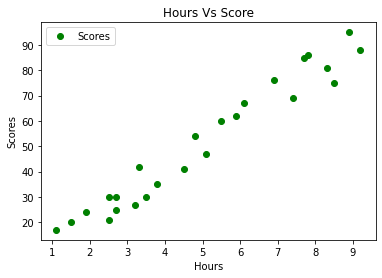

In [ ]:
#ploting the data to get an idea about polarity
sample_data.plot('Hours','Scores',color='green',marker='o',linestyle='None')
plt.set_color='green'
plt.title('Hours Vs Score')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
#preparing the training data
X=np.array(sample_data.Hours)
y=np.array(sample_data.Scores)
X=X.reshape((X.shape[0],1))


In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
#spliting the data into training and validation data

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=False)
reg.fit(X_train,y_train)
#training the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

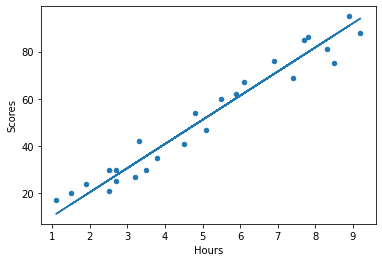

In [ ]:
#plotting the regression line
line= reg.intercept_+ reg.coef_*sample_data.Hours
sample_data.plot.scatter("Hours",'Scores')
plt.plot(sample_data.Hours,line)
plt.show()

In [ ]:
#making predictions
y_pred=reg.predict(X_test)
result=pd.Series(y_pred,index=y_test)
result

20    15.337585
27    32.720181
69    75.665418
30    25.562641
62    60.327833
dtype: float64

In [ ]:
#testing external data
hours=[[9.25]]
prediction=reg.predict(hours)
prediction[0]

94.58177250564873

This shows that if the student studies for 9.25 hours, he can get a score of about 94.58!!
This prediction is done using a simple linear regression model and does not guarantee good grades :)

In [ ]:
#checking r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9387377974189179

Yay! a decent r squared. This means our model fits about 93% accurately.